<a href="https://colab.research.google.com/github/ShahuPatil07/Rain-Prediction-Model/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [91]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc



##Reading the Data

In [92]:
df= pd.read_csv("dataset.csv")

##Dropping/Replacing Null Values

In [93]:
df.loc[df["PRCP"] > 0.0, "PRCP"] = 1.0

In [94]:
df=df.dropna(axis=1,thresh=100)
df['WT01'].fillna(df['WT01'].mode()[0], inplace=True)
df['WT08'].fillna(df['WT08'].mode()[0], inplace=True)
df

<ipython-input-94-583817f94126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WT01'].fillna(df['WT01'].mode()[0], inplace=True)
<ipython-input-94-583817f94126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WT08'].fillna(df['WT08'].mode()[0], inplace=True)


,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,1.0,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,1.0,1.0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,1.0,1.0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,1.0,1.0
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,1.0,66,55,270.0,260.0,8.9,18.1,1.0,1.0
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,1.0,56,47,90.0,260.0,14.1,21.0,1.0,1.0
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,0.0,65,42,340.0,360.0,10.1,18.1,1.0,1.0
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,0.0,69,44,260.0,260.0,6.9,12.1,1.0,1.0


In [95]:
df=df.drop(columns=['WT01','WT08','STATION','NAME','DATE'])
df

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2.46,0.0,64,43,10.0,30.0,8.1,11.0
1,2.01,0.0,65,47,270.0,30.0,6.0,8.9
2,0.67,0.0,62,44,150.0,150.0,10.1,14.1
3,1.34,1.0,69,55,270.0,280.0,8.1,14.1
4,2.46,1.0,59,49,140.0,140.0,10.1,16.1
...,...,...,...,...,...,...,...,...
1822,1.12,1.0,66,55,270.0,260.0,8.9,18.1
1823,4.70,1.0,56,47,90.0,260.0,14.1,21.0
1824,1.57,0.0,65,42,340.0,360.0,10.1,18.1
1825,0.45,0.0,69,44,260.0,260.0,6.9,12.1


##EDA

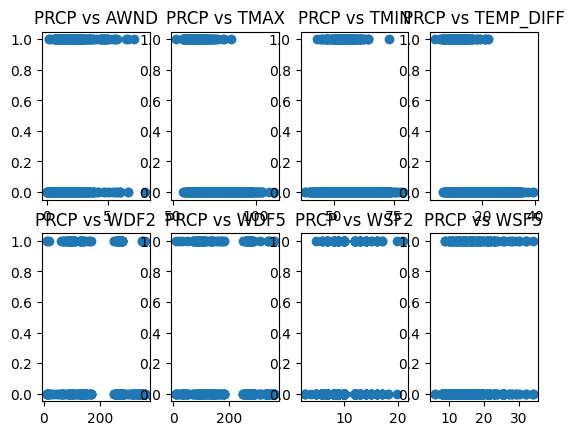

In [96]:
df['TEMP_DIFF']=df['TMAX']-df['TMIN']
fig,axs= plt.subplots(2,4)
axs[0,0].scatter(df['AWND'], df['PRCP'])
axs[0,0].set_title('PRCP vs AWND')
axs[0,1].scatter(df['TMAX'], df['PRCP'])
axs[0,1].set_title('PRCP vs TMAX')
axs[0,2].scatter(df['TMIN'], df['PRCP'])
axs[0,2].set_title('PRCP vs TMIN')
axs[0,3].scatter(df['TEMP_DIFF'], df['PRCP'])
axs[0,3].set_title('PRCP vs TEMP_DIFF')
axs[1,0].scatter(df['WDF2'], df['PRCP'])
axs[1,0].set_title('PRCP vs WDF2')
axs[1,1].scatter(df['WDF5'], df['PRCP'])
axs[1,1].set_title('PRCP vs WDF5')
axs[1,2].scatter(df['WSF2'], df['PRCP'])
axs[1,2].set_title('PRCP vs WSF2')
axs[1,3].scatter(df['WSF5'], df['PRCP'])
axs[1,3].set_title('PRCP vs WSF5')
plt.show()

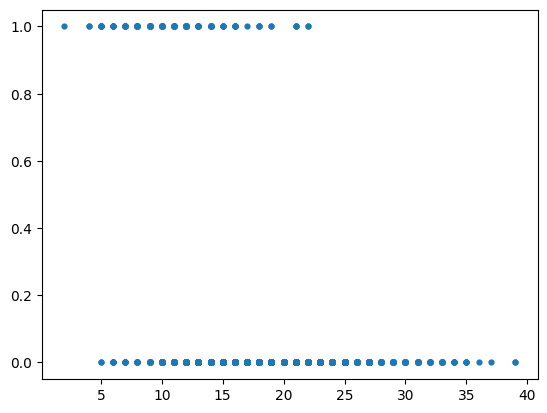

In [97]:
plt.scatter(df['TEMP_DIFF'],df['PRCP'],s=12)
plt.show()

##Correlation Matrix

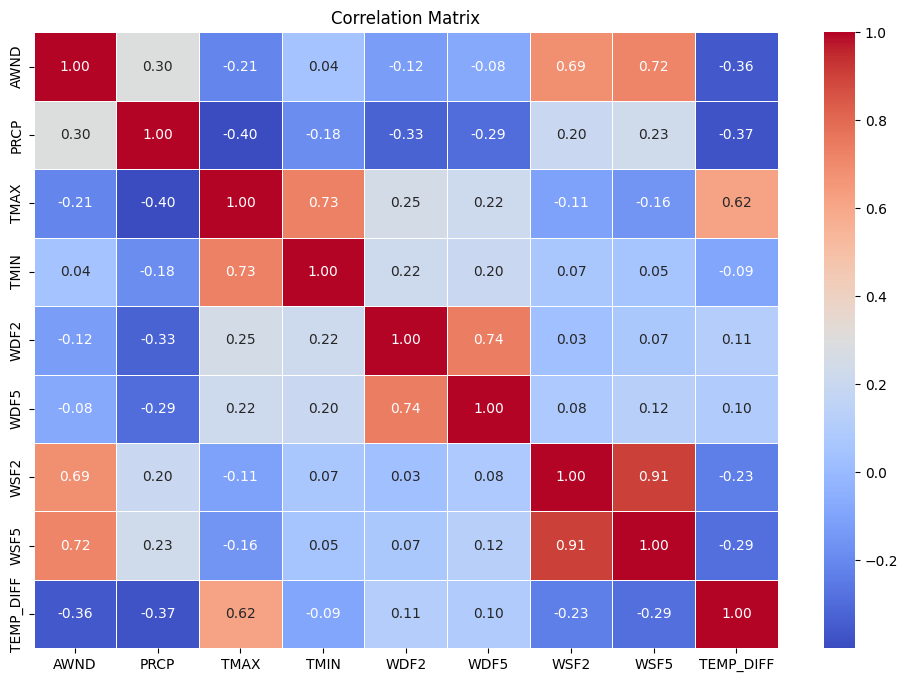

In [98]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

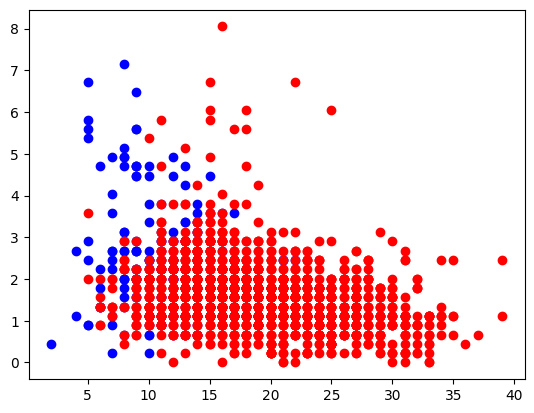

In [100]:
plt.scatter(df.loc[df['PRCP'] == 1, 'TEMP_DIFF'],
            df.loc[df['PRCP'] == 1, 'AWND'],
            color='blue', label='Rain Occurred')

plt.scatter(df.loc[df['PRCP'] == 0, 'TEMP_DIFF'],
            df.loc[df['PRCP'] == 0, 'AWND'],
            color='red', label='No Rain')
plt.show()

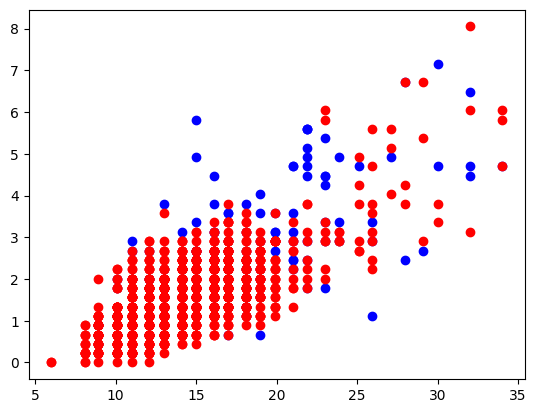

In [101]:
plt.scatter(df.loc[df['PRCP'] == 1, 'WSF5'],
            df.loc[df['PRCP'] == 1, 'AWND'],
            color='blue', label='Rain Occurred')
plt.scatter(df.loc[df['PRCP'] == 0, 'WSF5'],
            df.loc[df['PRCP'] == 0, 'AWND'],
            color='red', label='No Rain')
plt.show()

##SMOTE

In [102]:
df['AWND'].isnull().sum(), df['WDF2'].isnull().sum(), df['WDF5'].isnull().sum(), df['WSF2'].isnull().sum(), df['WSF5'].isnull().sum()

(4, 5, 18, 4, 18)

In [103]:
imputer = SimpleImputer(strategy='mean')
df['AWND'] = imputer.fit_transform(df[['AWND']])
df['WDF2'] = imputer.fit_transform(df[['WDF2']])
df['WDF5'] = imputer.fit_transform(df[['WDF5']])
df['WSF2'] = imputer.fit_transform(df[['WSF2']])
df['WSF5'] = imputer.fit_transform(df[['WSF5']])

In [104]:
df['AWND'].isnull().sum(), df['WDF2'].isnull().sum(), df['WDF5'].isnull().sum(), df['WSF2'].isnull().sum(), df['WSF5'].isnull().sum()


(0, 0, 0, 0, 0)

In [115]:
x = df.drop('PRCP', axis=1)
y = df['PRCP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
new_df=pd.concat([x_resampled,y_resampled], axis=1)
new_df

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,TEMP_DIFF,PRCP
0,2.680000,81,60,270.000000,270.000000,12.100000,17.000000,21,0.0
1,0.890000,88,66,260.000000,270.000000,8.100000,13.000000,22,0.0
2,0.890000,85,63,260.000000,260.000000,8.100000,13.000000,22,0.0
3,1.570000,86,65,270.000000,270.000000,8.900000,14.100000,21,0.0
4,2.460000,80,66,260.000000,260.000000,8.100000,14.100000,14,0.0
...,...,...,...,...,...,...,...,...,...
2655,1.059756,69,57,270.000000,260.000000,8.690455,13.288124,11,1.0
2656,3.066607,61,56,110.000000,101.938041,10.662032,18.836456,5,1.0
2657,2.169682,65,53,270.000000,260.000000,10.725051,17.178212,12,1.0
2658,2.509837,61,52,84.920503,35.079497,10.100000,15.279372,9,1.0


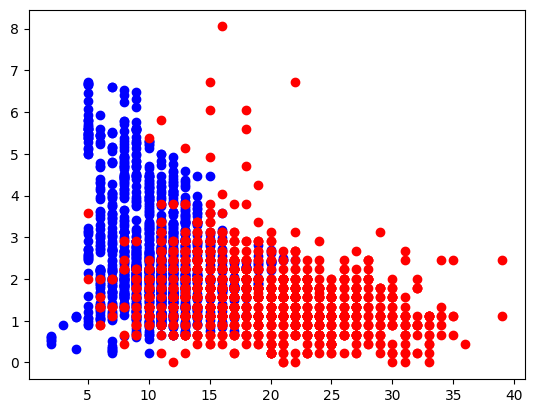

In [106]:
plt.scatter(x_resampled.loc[y_resampled == 1, 'TEMP_DIFF'],
            x_resampled.loc[y_resampled == 1, 'AWND'],
            color='blue', label='Rain Occurred')


plt.scatter(x_resampled.loc[y_resampled == 0, 'TEMP_DIFF'],
            x_resampled.loc[y_resampled == 0, 'AWND'],
            color='red', label='No Rain')
plt.show()

##Chi-Sqaured Test

In [107]:
chi_scores = chi2(x_resampled,y_resampled)
chi_scores

(array([  293.18680805,  1606.79664086,   287.12925517, 12451.96696968,
         8756.13604944,   133.69509606,   316.81695652,  3312.37488543]),
 array([1.00506126e-65, 0.00000000e+00, 2.09930815e-64, 0.00000000e+00,
        0.00000000e+00, 6.37046749e-31, 7.14903961e-71, 0.00000000e+00]))

<Axes: >

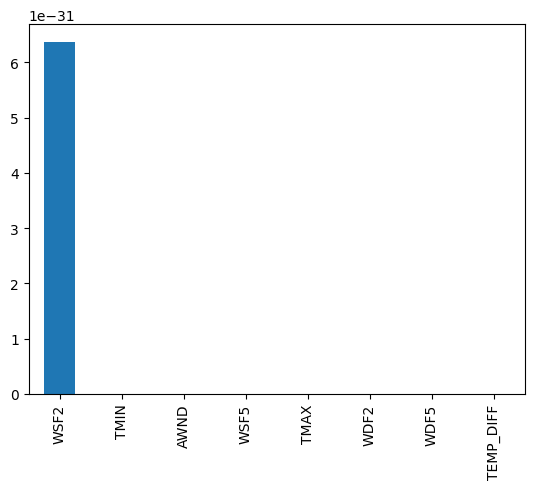

In [108]:
p_values = pd.Series(chi_scores[1],index = x_resampled.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

##Normalising the Dataset

In [116]:

dfnorm = new_df.copy()
for column in dfnorm.columns:
    dfnorm[column] = dfnorm[column]  / dfnorm[column].abs().max()
display(dfnorm)

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,TEMP_DIFF,PRCP
0,0.332919,0.750000,0.759494,0.750000,0.750000,0.576190,0.500000,0.538462,0.0
1,0.110559,0.814815,0.835443,0.722222,0.750000,0.385714,0.382353,0.564103,0.0
2,0.110559,0.787037,0.797468,0.722222,0.722222,0.385714,0.382353,0.564103,0.0
3,0.195031,0.796296,0.822785,0.750000,0.750000,0.423810,0.414706,0.538462,0.0
4,0.305590,0.740741,0.835443,0.722222,0.722222,0.385714,0.414706,0.358974,0.0
...,...,...,...,...,...,...,...,...,...
2655,0.131647,0.638889,0.721519,0.750000,0.722222,0.413831,0.390827,0.282051,1.0
2656,0.380945,0.564815,0.708861,0.305556,0.283161,0.507716,0.554013,0.128205,1.0
2657,0.269526,0.601852,0.670886,0.750000,0.722222,0.510717,0.505242,0.307692,1.0
2658,0.311781,0.564815,0.658228,0.235890,0.097443,0.480952,0.449393,0.230769,1.0


##Spliting the Data into train and test

In [117]:
x= dfnorm.drop(['PRCP'],axis=1)
y= dfnorm['PRCP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Logistic Regression

In [119]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
acc1= accuracy_score(y_test,y_pred)
roc1= roc_auc_score(y_test,y_pred)
report= classification_report(y_test,y_pred,output_dict=True)
report_df1 = pd.DataFrame(report).transpose()
report_df1


,precision,recall,f1-score,support
0.0,0.879245,0.872659,0.87594,267.00000
1.0,0.872659,0.879245,0.87594,265.00000
accuracy,0.875940,0.875940,0.87594,0.87594
macro avg,0.875952,0.875952,0.87594,532.00000
weighted avg,0.875965,0.875940,0.87594,532.00000


<Axes: >

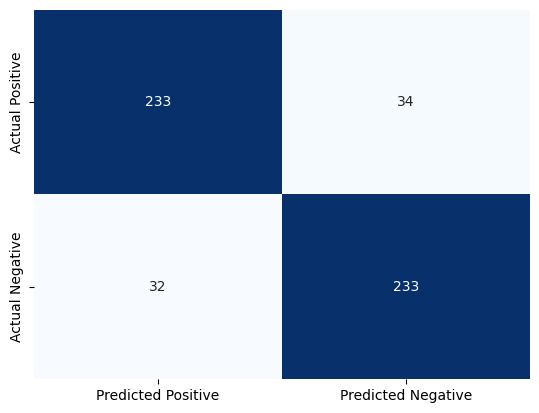

In [120]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

##Decision Tree

In [121]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
acc2= accuracy_score(y_test,y_pred)
roc2= roc_auc_score(y_test,y_pred)
report= classification_report(y_test,y_pred,output_dict=True)
report_df2 = pd.DataFrame(report).transpose()
report_df2

,precision,recall,f1-score,support
0.0,0.930403,0.951311,0.940741,267.00000
1.0,0.949807,0.928302,0.938931,265.00000
accuracy,0.939850,0.939850,0.939850,0.93985
macro avg,0.940105,0.939806,0.939836,532.00000
weighted avg,0.940068,0.939850,0.939839,532.00000


<Axes: >

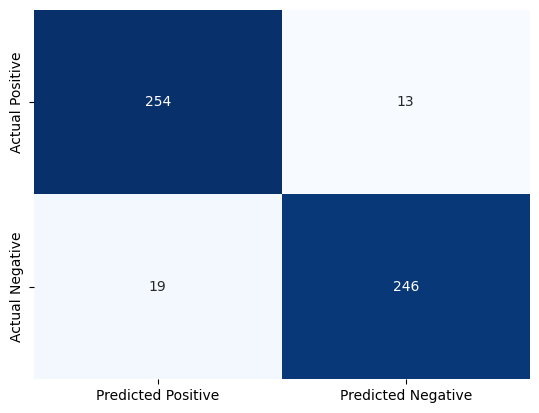

In [122]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

In [123]:
nnmodel = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
nnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nnmodel.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred = nnmodel.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
acc3= accuracy_score(y_test,y_pred)
roc3= roc_auc_score(y_test,y_pred)
report= classification_report(y_test,y_pred,output_dict=True)
report_df3 = pd.DataFrame(report).transpose()
report_df3

Epoch 1/100
54/54 [==============================] - 1s 7ms/step - loss: 0.6513 - accuracy: 0.6774 - val_loss: 0.6188 - val_accuracy: 0.7113
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7615 - val_loss: 0.5182 - val_accuracy: 0.8216
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8049 - val_loss: 0.4441 - val_accuracy: 0.7840
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8137 - val_loss: 0.4015 - val_accuracy: 0.8263
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8237 - val_loss: 0.3866 - val_accuracy: 0.8239
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8278 - val_loss: 0.3716 - val_accuracy: 0.8333
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8231 - val_loss: 0.3689 - val_accuracy: 0.8357
Epoch 8/100
5

,precision,recall,f1-score,support
0.0,0.899254,0.902622,0.900935,267.000000
1.0,0.901515,0.898113,0.899811,265.000000
accuracy,0.900376,0.900376,0.900376,0.900376
macro avg,0.900384,0.900367,0.900373,532.000000
weighted avg,0.900380,0.900376,0.900375,532.000000


<Axes: >

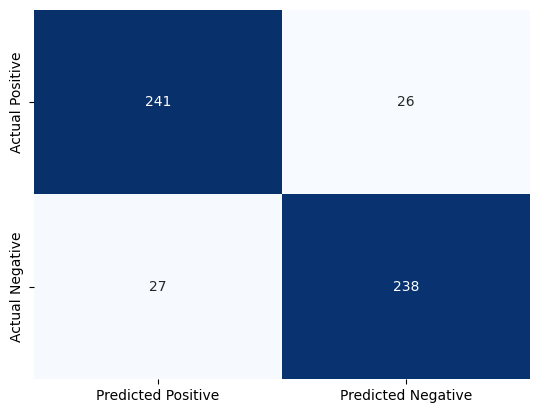

In [124]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

In [129]:

models = ['Logistic Regression', 'Decision Tree', 'Neural Networks']
accuracy_scores = [acc1*100,acc2*100,acc3*100]
roc_auc_scores = [roc1*100,roc2*100,roc3*100]

analysis = {'Model': models, 'Accuracy': accuracy_scores, 'ROC-AUC': roc_auc_scores}
analysis_df = pd.DataFrame(analysis)
analysis_df




,Model,Accuracy,ROC-AUC
0,Logistic Regression,87.593985,87.595223
1,Decision Tree,93.984962,93.980637
2,Neural Networks,90.037594,90.036747


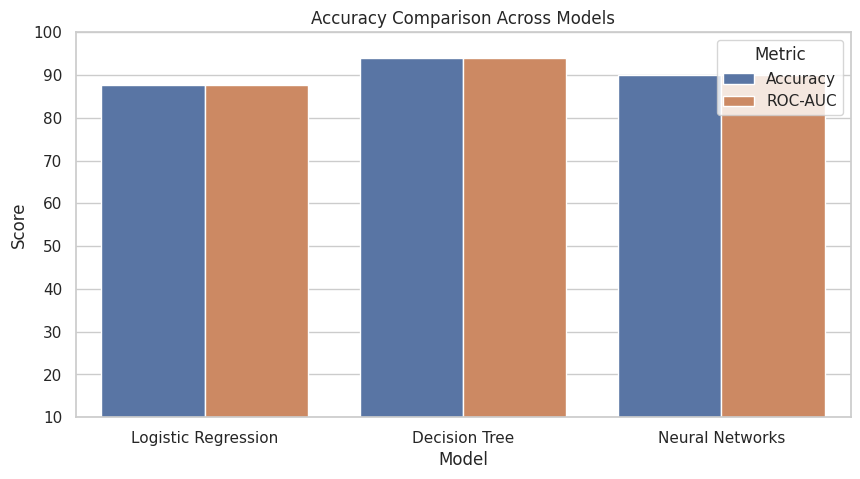

In [132]:
df_melted = pd.melt(analysis_df, id_vars='Model', var_name='Metric', value_name='Score')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)
plt.title('Accuracy Comparison Across Models')
plt.ylim(10, 100)
plt.show()